In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
X,y = fetch_openml('mnist_784', version=1, return_X_y=True)
X_train, y_train = X[:60000], y[:60000]
X_test,y_test = X[-10000:], y[-10000:]
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

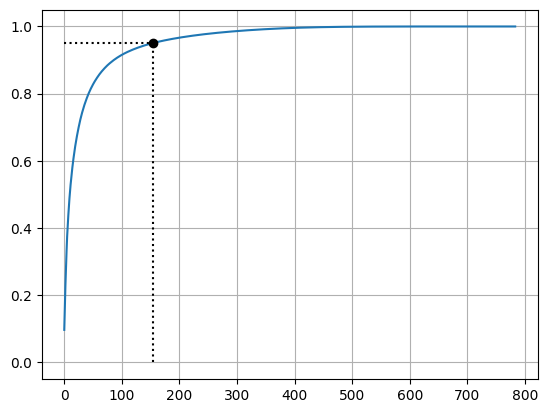

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(random_state = 42)

X_pca = X_train.copy()

X_pca = pca.fit_transform(X_pca)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

plt.plot(cumsum)
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid()
plt.show()

## RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train,y_train)
y_pred = forest_clf.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))

Accuracy:  0.9705
Recall:  0.9702072950839545
Precision:  0.9703666911082005


In [ ]:
from sklearn.pipeline import make_pipeline, Pipeline

pipe = make_pipeline(
    PCA(n_components = d, random_state=42),
    RandomForestClassifier(random_state=42)
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))

Accuracy:  0.9488
Recall:  0.9483068112749832
Precision:  0.9481249041850767


## SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train)
y_pred = sgd_clf.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))

Accuracy:  0.874
Recall:  0.8722016551120783
Precision:  0.8866401587452636


In [ ]:
pipe = make_pipeline(
    PCA(n_components = d, random_state=42),
    SGDClassifier(random_state=42)
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))

Accuracy:  0.8959
Recall:  0.8942606675136014
Precision:  0.8947140062409291


In [ ]:
X_pca = X_train.copy()
y_pca = y_train.copy()
pca = PCA(n_components = 2, random_state=42)
X_pca = pca.fit_transform(X_pca)

X_pca.shape

(60000, 2)

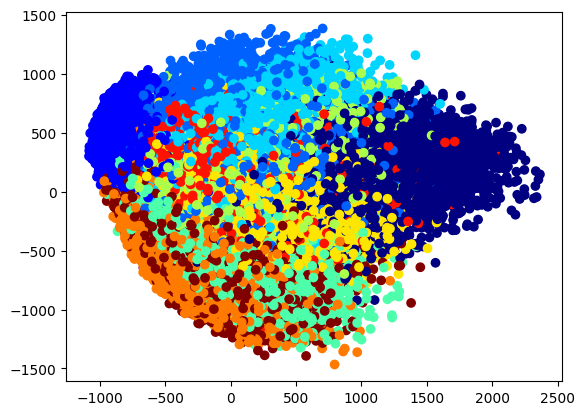

In [ ]:
plt.scatter(X_pca[: , 0], X_pca[: , 1], c=y_pca.astype(int), cmap="jet")
plt.show()